<a href="https://colab.research.google.com/github/carlosrivero24-sys/Inteligencia_Artificial/blob/main/CNN/Clasificaci%C3%B3nnumeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()
#Se importa load_digits de sklearn.datasets que cargara un conjunto de datos del 0 al 9 escritos a mano, load_digits le daremos un nuevo nombre para que sea mas corto, ahora se llamara digits

In [4]:
type(digits)
#Ocupamos la funcion type para saber que tipo de objeto es digits

sklearn.utils._bunch.Bunch

In [5]:
digits.keys()
#Ocupamos digits.keys para saber que tipo de llaves tiene en este caso digts

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
print(digits.DESCR)
#Imprimimos una de sus llaves que contiene la descripcion de digits y nos enseña sus caracterizticas e informacion relevante

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [7]:
index = 0
image = digits.images[index]
label = digits.target[index]
#ocupamos index para fijar un indice, ocupamos otras de las llaves de digits y les ponemos el indice ya fijado

In [8]:
print(image)
#pedimos que nos imprima image

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


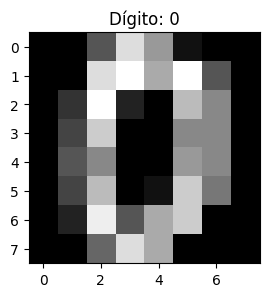

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.gray)
plt.title(f'Dígito: {label}')
plt.show()
# Importamos matplotlib.pyplot para poder pedirle que nos muestre digamos una grafica con el numero que le pongamos en el indice

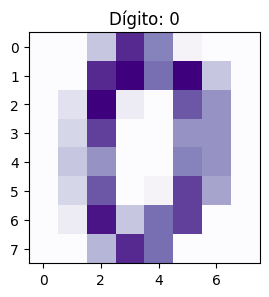

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.Purples)
plt.title(f'Dígito: {label}')
plt.show()
#Ocupamos el mismo codigo pasado pero solo le cambiamos el color

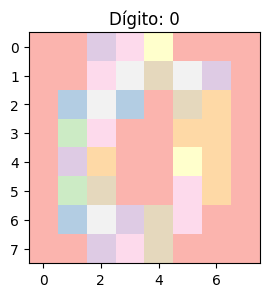

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.Pastel1)
plt.title(f'Dígito: {label}')
plt.show()
#Igual solo cambiamos el color

In [12]:
image.shape
#Pedimos el numero de filas y columnas de image

(8, 8)

In [13]:
digits.data
#Nos da el valor de llave en este caso data de digits


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [14]:
digits.data.shape
#Pedimos el valor de columnas y filas de data

(1797, 64)

In [15]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
#Importamos tenserflow y lo llamamos tf
#imporrtamos train_test_split para dividir los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target,
    test_size=0.2, random_state=42
)
#ocupamos el 80% de datos para entrenar el modelo y 20% para probarlos
# One-hot encode the target variable
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [16]:
y_train
#pedimos los datos de y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [17]:
y_train.shape
#Numero de filas y columnas de y_train

(1437, 10)

In [18]:
y_train[0]
#nos muestra un vector de 10 numeros

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [19]:
print(X_train.shape)
print(X_test.shape)
#pedimos que nos imprima el numero de dilas y columnas de x_train y x_test que ya esta dividido el 80 y el 20%

(1437, 64)
(360, 64)


In [20]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
print(reshaped_tensor)
#Nos hace una matriz de 8*8 donde tenemos 64 datos en total

tf.Tensor(
[[ 0.  0.  3. 14.  1.  0.  0.  0.]
 [ 0.  0. 12. 12.  0.  0.  0.  0.]
 [ 0.  3. 16.  6.  0.  0.  0.  0.]
 [ 0.  5. 16.  2.  0.  0.  0.  0.]
 [ 0.  6. 16.  2.  5.  2.  0.  0.]
 [ 0.  4. 16.  2. 12. 15.  2.  0.]
 [ 0.  1. 14. 13.  2. 13. 11.  0.]
 [ 0.  0.  3. 11. 16. 13.  4.  0.]], shape=(8, 8), dtype=float64)


In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#Importamos  MinMaxScaler, StandardScaler de la biblioteca sklearn.preprocessing que nos ayudara a normalizar o escalar los datos para poder trabajar con ellos en este caso utilizamos StandardScaler donde nos da la media 0 y la varianza 1
# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
# Redondeamos para tener una mejor visualizacion de nuestros datos
reshaped_tensor =  tf.floor(reshaped_tensor * 100) / 100
print(reshaped_tensor)

tf.Tensor(
[[ 0.   -0.35 -0.47  0.5  -2.55 -1.04 -0.41 -0.14]
 [-0.07 -0.62  0.3   0.   -2.19 -1.36 -0.53 -0.14]
 [-0.05  0.12  1.08 -0.2  -1.17 -1.28 -0.56 -0.12]
 [-0.04  0.86  1.13 -1.17 -1.61 -1.29 -0.63 -0.05]
 [ 0.    1.09  1.34 -1.13 -0.91 -1.14 -0.82  0.  ]
 [-0.07  0.82  1.39 -0.83  0.69  1.17 -0.34 -0.1 ]
 [-0.04  0.15  1.14  0.64 -1.43  0.68  1.47 -0.22]
 [-0.03 -0.31 -0.5  -0.25  0.84  1.05  0.45 -0.2 ]], shape=(8, 8), dtype=float64)


In [23]:
# Redimensionar el tensor a la forma (total, 8, 8)
X_train = tf.reshape(X_train, (X_train.shape[0], 8, 8))
X_test = tf.reshape(X_test, (X_test.shape[0], 8, 8))

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
#Importamos nuestra red neuronal convulucionar
# Crear el modelo de CNN, se crea un modelo secuencial de Keras, que es una pila lineal de capas, contiene una capa convolucional con 32 filtros un tamaño de kernel de 3*3 y la funcion de activacion de relu, tiene solo una capa densa de 128 neuronas y una capa de salida de 10
model = Sequential([
    Conv2D(32, kernel_size=(3, 3),
        activation='relu',
        input_shape=(8, 8, 1)
    ),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
from tensorflow.keras.optimizers import Adam
#se importa Adam para tener nuestro optimizador que tendra una tasa de aprendizaje de 0.001
# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
#Se compila el modelo con el optimizador adam y tendremos nuestra funcion perdida en este caso categorical_crossentropy que en español es entropía cruzada categórica dispersa para la clasificación

In [26]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)
#Entrenamos nuestro modelo con nuestras 10 capas, el tamaño del batch y la validacion con el 0.2

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.3912 - loss: 1.9901 - val_accuracy: 0.8403 - val_loss: 0.9213
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8827 - loss: 0.6820 - val_accuracy: 0.9167 - val_loss: 0.4027
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9536 - loss: 0.2616 - val_accuracy: 0.9306 - val_loss: 0.2956
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9671 - loss: 0.1558 - val_accuracy: 0.9271 - val_loss: 0.2384
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9742 - loss: 0.1208 - val_accuracy: 0.9514 - val_loss: 0.1841
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9904 - loss: 0.0816 - val_accuracy: 0.9583 - val_loss: 0.1608
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9935 - loss: 0.0661 - val_accuracy: 0.9618 - val_loss: 0.1472
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9900 - loss: 0.0531 - val_accuracy: 0.9549 - val_loss

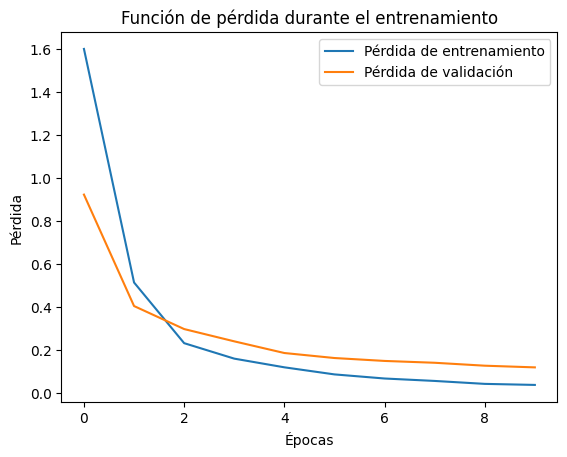

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()
#Graficamos nuestros resultados de perdida de entrenamiento y perdida de validacion

In [28]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')
#le pedimos que nos imprima lo que es nuestra "loss" que es la medida de cuán mal se está comportando el modelo. Cuanto menor sea la pérdida, mejor y el accuracy que es la proporción de predicciones correctas sobre el número total de predicciones. Cuanto mayor sea este valor o más cercano a 1.0 o 100% mejor.

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9781 - loss: 0.0660
Loss: 0.06772836297750473, Accuracy: 0.9777777791023254


In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert y_test back to multiclass format
y_test_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)
#Se calcula la matriz de confusión utilizando confusion_matrix. Se calcula la sensibilidad (recall) para cada clase utilizando recall_score.

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


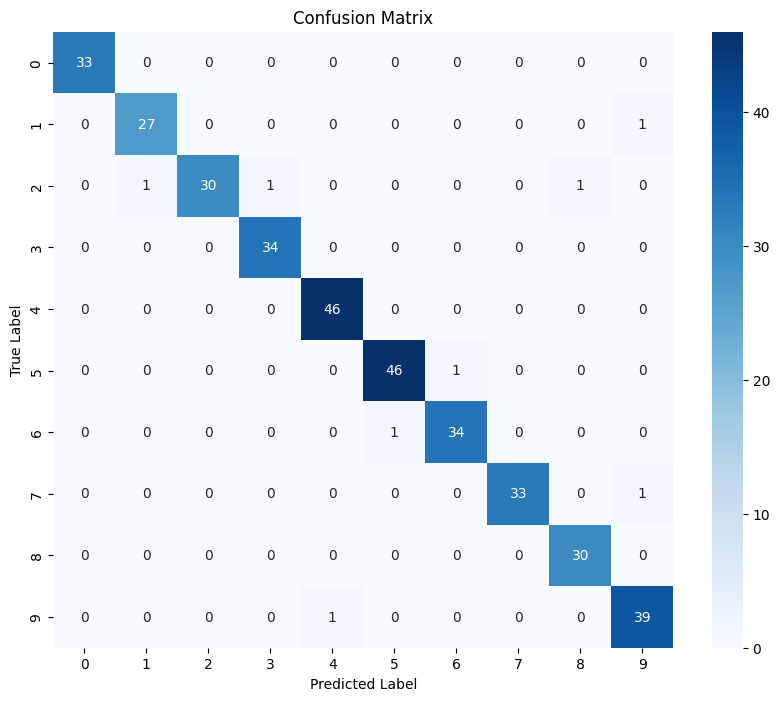

Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 0.9642857142857143
Class 2: 0.9090909090909091
Class 3: 1.0
Class 4: 1.0
Class 5: 0.9787234042553191
Class 6: 0.9714285714285714
Class 7: 0.9705882352941176
Class 8: 1.0
Class 9: 0.975


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz de confusión como una imagen de colores
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(10):
    print(f'Class {i}: {sensitivity[i]}')